### EClat Alogorithm Python

#### Step 1 — List the Transaction ID (TID) set of each product
The first step is to make a list that contains, for each product, a list of the Transaction IDs in which the product occurs. This list is represented in the following table.

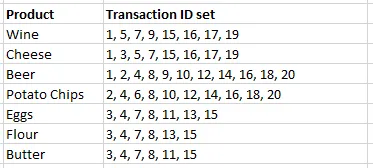

In [1]:
from IPython import display
display.Image(r"C://Users//rajat.k.srivastava//Downloads//Eclat-1.png")

These transaction ID lists are is called the Transaction ID Set, also called TID set.

##### Step 2 — Filter with minimum support
The next step is to decide on a value called the minimum support. The minimum support will serve to filter out products that do not occur often enough to be considered.

In the current example, we will choose a value of 7 for the minimum support. As you can see in the table of Step 1, there are two products that have a TID set that contains less than 7 transactions: Flour and Butter. Therefore, we will filter them out, and we obtain the following table:

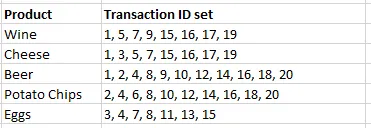

In [2]:
from IPython import display
display.Image(r"C://Users//rajat.k.srivastava//Downloads//Eclat-2.png")

##### Step 3 — Compute the Transaction ID set of each product pair
We now move on to pairs of products. We will basically repeat the same thing as in step 1, but now for product pairs.

The interesting thing about the ECLAT algorithm is that this step is done using the Intersection of the two original sets. This makes it different from the Apriori algorithm.

The ECLAT algorithm is faster because it is much simpler to identify the intersection of the set of transactions IDs than to scan each individual transaction for the presence of pairs of products (as Apriori does). You can see in the below image how it's easy to filter out the transaction IDs that are common between the product pair Wine and Cheese:

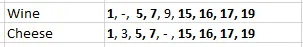

In [3]:
from IPython import display
display.Image(r"C://Users//rajat.k.srivastava//Downloads//Eclat-3.png")

When doing the intersection for each product pair (ignoring the products that did not reach support individually) this gives the following table:

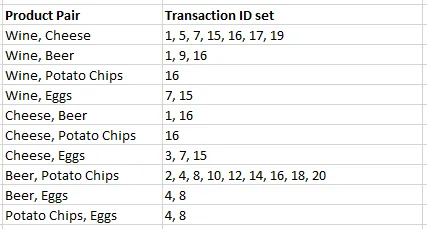

In [4]:
from IPython import display
display.Image(r"C://Users//rajat.k.srivastava//Downloads//Eclat-4.png")

##### Step 4 — Filter out the pairs that do not reach minimum support
As before, we need to filter out results that do not reach the minimum support of 7. This leaves us with only two remaining product pairs: Wine & Cheese and Beer & Potato Chips.

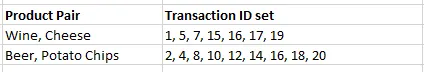

In [5]:
from IPython import display
display.Image(r"C://Users//rajat.k.srivastava//Downloads//Eclat-5.png")

#### Step 5— Continue as long as you can make new pairs above support
From this point on, you repeat the steps as long as possible. For the current example, if we create the product pairs of three products, you’ll find that there aren’t any groups of three that reach the minimum support level. Therefore, the association rules will be those obtained in the previous step.

### Python Implementaion

In [6]:
# store the item sets as tuples of strings in a list
transactions = [
    ("beer", "wine", "cheese"),
    ("beer", "potato chips"),
    ("eggs", "flour", "butter", "cheese"),
    ("eggs", "flour", "butter", "beer", "potato chips"),
    ("wine", "cheese"),
    ("potato chips"),
    ("eggs", "flour", "butter", "wine", "cheese"),
    ("eggs", "flour", "butter", "beer", "potato chips"),
    ("wine", "beer"),
    ("beer", "potato chips"),
    ("butter", "eggs"),
    ("beer", "potato chips"),
    ("flour", "eggs"),
    ("beer", "potato chips"),
    ("eggs", "flour", "butter", "wine", "cheese"),
    ("beer", "wine", "potato chips", "cheese"),
    ("wine", "cheese"),
    ("beer", "potato chips"),
    ("wine", "cheese"),
    ("beer", "potato chips"),
]

In [7]:
import pandas as pd

# you simply convert the transaction list into a dataframe
data = pd.DataFrame(transactions)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,beer,wine,cheese,None,None,None,None,None,None,None,None,None
1,beer,potato chips,None,None,None,None,None,None,None,None,None,None
2,eggs,flour,butter,cheese,None,None,None,None,None,None,None,None
3,eggs,flour,butter,beer,potato chips,None,None,None,None,None,None,None
4,wine,cheese,None,None,None,None,None,None,None,None,None,None
5,p,o,t,a,t,o,,c,h,i,p,s
6,eggs,flour,butter,wine,cheese,None,None,None,None,None,None,None
7,eggs,flour,butter,beer,potato chips,None,None,None,None,None,None,None
8,wine,beer,None,None,None,None,None,None,None,None,None,None
9,beer,potato chips,None,None,None,None,None,None,None,None,None,None


In [8]:
# we are looking for itemSETS
# we do not want to have any individual products returned
min_n_products = 2

# we want to set min support to 7
# but we have to express it as a percentage
min_support = 7/len(transactions)

# we have no limit on the size of association rules
# so we set it to the longest transaction
max_length = max([len(x) for x in transactions])

In [9]:
from pyECLAT import ECLAT

# create an instance of eclat
my_eclat = ECLAT(data=data, verbose=True)

# fit the algorithm
rule_indices, rule_supports = my_eclat.fit(min_support=min_support,
                                           min_combination=min_n_products,
                                           max_combination=max_length)

100%|████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 2218.66it/s]


Combination 2 by 2


10it [00:00, 249.56it/s]


Combination 3 by 3


10it [00:00, 202.47it/s]


Combination 4 by 4


5it [00:00, 144.77it/s]


Combination 5 by 5


1it [00:00, 99.05it/s]


Combination 6 by 6


0it [00:00, ?it/s]


Combination 7 by 7


0it [00:00, ?it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]


Combination 12 by 12


0it [00:00, ?it/s]


In [10]:
print(rule_supports)

{'potato chips & beer': 0.45, 'cheese & wine': 0.35}


### Conclusion
The interpretation of this is that within the transactions of our night store, there are two product combinations that are relatively strong. People often buy Wine and Cheese together. People also often buy Potato Chips and Beer together. Clearly, it could be a good idea to put those products together so that people can easily get to both of them. Or maybe the shop owner could think about packaging the products in an attractive offer to boost sales of those products even more.